In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Finding and Cleaning Dataset

The analyzed data is Amazon reviews of Androids Apps available for purchase through the platform. 

In [4]:
#Dataset from http://jmcauley.ucsd.edu/data/amazon/
data = pd.read_json("../data/reviews.json", lines=True)

In [5]:
print(data.columns)

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


In [6]:
#All of the values in the rating column are integer (no NaN). Try to check the same for 
#any other columns where we might use the values
print(data.isnull().overall.sum())
print(data.isnull().reviewText.sum())

0
0


## Elementary Data Analysis

In [7]:
print(data.overall.mean())
print(data.overall.median())

3.968930999539138
5.0


An interesting thing to note is that although the mean value of reviews is 3.96, the median is actually 5.0. This means that a surprising majority of the reviews gave the product a 5.0 while there were still a considerable amount of lower reviews (given the average, we can assume that they were around 1.0 or 2.0 star reviews).

In [8]:
print(data.groupby('overall')['asin'].count())
print(data.overall.var())

overall
1     78713
2     44385
3     85121
4    158081
5    386637
Name: asin, dtype: int64
1.8022623475015045


The above confirms this suspicion. There is an overwhelming amount of 5 star reviews while there is still a handful of lower star reviews that drag down the average to be 3.9, showing a considerably high value of variance. It's important to look at this because later on, when we try to determine a good/bad review, we need to be able to accurate split the data into two categories. Splitting based on >3.0 and <3.0 may have seemed like a good idea at first, but after looking at the mean and variance, it seems are though >4.0 and <4.0 may allow for more balance, better training test sets and better results. 

## Special Pandas

In [9]:
grouped = data.groupby('overall')
grouped.get_group(3).summary

0                                               Really cute
11                                      Could be better....
13                                  Good for small children
33        Good functions, but so many others do this and...
38                                     Long Time Subscriber
43                                        Needs Improvement
46                   Additional Cost involved with Rhapsody
56                                               If only...
57                                                It's Okay
65              If you already have Rhapsody is a good app.
87                                      Good but no history
93                         YOU NEED INTERNET CONNECTION !!!
97                                                 Devotion
101                                                    good
102                                     The Word of the Day
110                             Can be frustrating at times
138                                    E

As you can see from a quick glance at the 3 star reviews above, a good chunk of them seem to be very negative, especially linguistically. For example: "Not too fond of this game yet" "need improvement" "can be frustrating at times." By lumping this together with the "good reviews," our model may get confused with the sentiment meaning of each word (although the same could be said with putting it with the "bad reviews" but I believe this is the better option given that we have much more training data on "good reviews."). 

## Matplotlib

The purpose of this section is to look specifically at one product that has a lot of reviews (over 200) and then inspect how the ratings change over time. This is especially useful for pinpointing if there are periods during which the app received many low reviews and then a "bounceback," which can be indicative of a new update that fixes errors that users had. From this graph, we can then look into the android play store and look at the specific time period of the bounceback to see how the creator adapted to the issues (to then see if this app/company is worth investing in)

In [11]:
spec_data = data.loc[data['asin'] == 'B004DLPXAO']
spec_data = spec_data[['overall', 'reviewTime']]

In [12]:
spec_data['month_year'] = pd.to_datetime(spec_data.reviewTime)
spec_data.drop(columns='reviewTime')

,overall,month_year
1338,4,2014-07-16
1339,5,2011-10-28
1340,4,2014-01-25
1341,5,2013-01-27
1342,2,2014-04-13
1343,4,2011-03-27
1344,5,2014-01-11
1345,5,2013-01-15
1346,5,2014-03-21
1347,5,2013-10-11


In [13]:
graph_data = spec_data.groupby([(spec_data.month_year.dt.year),(spec_data.month_year.dt.month)]).mean()

In [14]:
month_start = 3
year_start = 2011
x_val = []
while (month_start != 8) or (year_start != 2014):
    add_x = str(month_start) + '-' + str(year_start)
    x_val.append(add_x)
    month_start+=1
    if(month_start > 12):
        month_start = 1
        year_start += 1

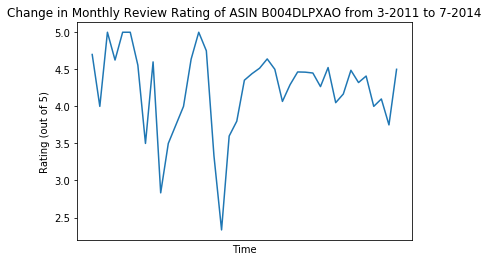

In [15]:
plt.plot(x_val, graph_data.overall.values)
plt.title("Change in Monthly Review Rating of ASIN B004DLPXAO from 3-2011 to 7-2014")
plt.xlabel("Time")
plt.ylabel("Rating (out of 5)")
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.show()

## Sklearn

Sentiment Analysis, essentially looking at the "feelings" or "opinions" expressed by words in a text, is a huge part of Natural Language Processing. Therefore, what will be done below is taking all of the Amazon Android App product reviews, mapping each one to a 0 or 1 label (good review/bad review) based on the rating given and using that data to train a model (supervised binary classification with logistic regression). We're going to make this a supervised task because our data is already conveniently labeled for us (the rating).

In [189]:
import sklearn

Starting off with a small sample of the data to figure out the best regularization parameter (and for testing this on a reasonably sized dataset). We'll also be grabbing 500 random rows as our test set at this time.

In [355]:
data_sample = data[['overall', 'reviewText']][0:1000].groupby('overall')
data_sample.count()

,reviewText
overall,
1,128
2,86
3,133
4,173
5,480


For all tasks with text data, it's best to start off by cleaning the data, removing all punctuation and making everything lowercase.

In [338]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\#)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(\&)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    return reviews

Now we should vectorize the data (so that we're dealing with numbers versus words) through one hot encoding

In [385]:
from sklearn.feature_extraction.text import CountVectorizer

train_sample_clean = []

for x in range(1,6):
    train_sample_clean += preprocess_reviews(data_sample.get_group(x)['reviewText'])
    
cv = CountVectorizer(binary=True)
cv.fit(train_sample_clean)
X_sample = cv.transform(train_sample_clean)

Now training the model with our sample data and then seeing the best hyperparameter value to use for final training (of which we'll use 0.1)

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target_sample = [0 if i < 347 else 1 for i in range(1000)]

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, target_sample, train_size = 0.75
)

for c in [0.01, 0.05, 0.10, 0.20, .25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_sample, y_train_sample)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test_sample, lr.predict(X_test_sample))))

Accuracy for C=0.01: 0.696
Accuracy for C=0.05: 0.736
Accuracy for C=0.1: 0.752
Accuracy for C=0.2: 0.752
Accuracy for C=0.25: 0.752
Accuracy for C=0.5: 0.744
Accuracy for C=1: 0.744


Now we'll try training on the entire dataset

In [388]:
data_train = data[['overall', 'reviewText']].groupby('overall')
data_train.count()

,reviewText
overall,
1,78713
2,44385
3,85121
4,158081
5,386637


In [390]:
train_clean = []

for x in range(1,6):
    train_clean += preprocess_reviews(data_train.get_group(x)['reviewText'])

cv = CountVectorizer(binary=True)
cv.fit(train_clean)
X = cv.transform(train_clean)

In [395]:
target = [0 if i < 208219 else 1 for i in range(752937)]

X_train, X_test, y_train, y_test = train_test_split(
    X, target, train_size = 0.75
)

final = LogisticRegression(C=0.05)
final.fit(X_train, y_train)
print ("Accuracy for C=0.10: %s" 
        % (accuracy_score(y_test, final.predict(X_test))))

Accuracy for C=0.10: 0.8656094775148087


Just so we can be certain that our model is actually working, we can look at the 10 words with the highest coefficients and the top words with the lowest coefficients (these loosely indicate, with respect to each other, the words with the most "weight" on determining if a review is positive or negative respectively)

In [401]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:10]:
    print (best_positive)

('awesome', 1.6818515173626531)
('amazing', 1.5361534791695488)
('love', 1.4817169231051412)
('addicting', 1.4017080906931805)
('awsome', 1.3855945556709497)
('addicted', 1.3734709879320028)
('addictive', 1.3338081990911919)
('luv', 1.3013042364457492)
('rocks', 1.2804683040673004)
('wonderful', 1.271428547032307)


In [400]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:10]:
    print (best_negative)

('uninstalled', -1.8698815139145946)
('worst', -1.8169994587038232)
('deleted', -1.816492267949209)
('terrible', -1.5189429132363357)
('horrible', -1.4842666889228289)
('removed', -1.457544481384688)
('sucks', -1.418044589039837)
('uninstalling', -1.412900113734593)
('disappointing', -1.406686282130439)
('okay', -1.3922510274603668)
